In [1]:
from itertools import product
import networkx as nx
import pulp
import matplotlib.pyplot as plt
%matplotlib inline

## Pipeline

In [6]:
m = 5

In [7]:
S, D = parse_input(m)
print D
S

[2, 0, 2, 1, 2, 1]


[[9, 0, 3, 4, 2],
 [7, 0, 7, 9, 4],
 [3, 9, 4, 5, 8],
 [3, 4, 1, 0, 9],
 [5, 1, 5, 4, 5],
 [1, 2, 5, 3, 1]]

In [8]:
ilp_solver, s_star_to_color_edges = build_ilp_solver(S, m, D)
s_star = solve_ilp(ilp_solver, s_star_to_color_edges)

39542


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':
/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


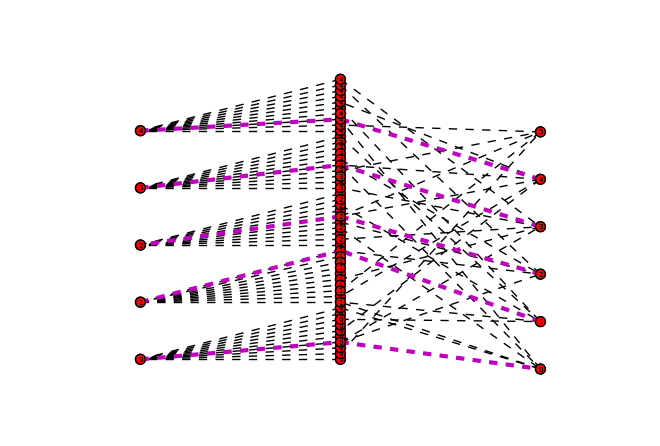

In [9]:
draw_graph(S, m, s_star_to_color_edges)


In [10]:
m = 16

In [11]:
S, D = parse_input(m)
print D
S

[2, 1, 3, 3, 3, 1, 2, 3, 1, 2, 3, 1, 1, 2, 0, 2, 2, 3, 1, 3, 3, 2]


[[5, 6, 1, 6, 1, 8, 5, 6, 5, 0, 5, 1, 8, 2, 9, 3],
 [3, 8, 4, 7, 4, 3, 9, 6, 4, 7, 2, 9, 3, 0, 4, 7],
 [5, 8, 5, 5, 4, 6, 2, 9, 4, 0, 8, 1, 0, 5, 8, 7],
 [9, 7, 4, 2, 8, 5, 5, 5, 0, 7, 0, 6, 8, 3, 5, 3],
 [4, 2, 9, 6, 8, 4, 9, 6, 4, 3, 6, 0, 7, 5, 4, 3],
 [3, 1, 7, 4, 2, 4, 8, 4, 3, 9, 4, 6, 5, 8, 5, 8],
 [4, 5, 1, 3, 5, 5, 9, 0, 9, 4, 1, 4, 6, 1, 1, 7],
 [7, 8, 9, 0, 9, 7, 1, 5, 4, 8, 9, 0, 8, 0, 6, 7],
 [8, 1, 5, 7, 3, 5, 6, 3, 4, 4, 1, 1, 8, 4, 8, 3],
 [2, 6, 1, 5, 2, 5, 0, 7, 4, 4, 3, 8, 6, 8, 9, 9],
 [8, 6, 9, 0, 0, 9, 5, 8, 5, 1, 5, 2, 6, 2, 5, 4],
 [6, 3, 7, 5, 7, 1, 1, 9, 1, 5, 0, 7, 7, 0, 5, 0],
 [6, 9, 1, 3, 8, 5, 9, 1, 7, 3, 1, 2, 1, 3, 6, 0],
 [6, 4, 4, 2, 8, 8, 9, 0, 5, 5, 0, 4, 2, 7, 6, 8],
 [2, 3, 2, 1, 3, 8, 6, 1, 0, 4, 3, 0, 3, 8, 4, 5],
 [2, 3, 2, 6, 5, 0, 9, 4, 7, 1, 2, 7, 1, 4, 4, 8],
 [5, 2, 5, 1, 5, 8, 3, 3, 7, 9, 6, 4, 4, 3, 2, 2],
 [1, 7, 4, 8, 2, 7, 0, 4, 7, 6, 7, 5, 8, 2, 7, 6],
 [4, 8, 9, 5, 7, 2, 2, 6, 5, 2, 1, 9, 0, 3, 0, 6],
 [3, 0, 4, 1, 6, 3, 1, 1, 1, 7,

In [12]:
ilp_solver, s_star_to_color_edges = build_ilp_solver(S, m, D)
s_star = solve_ilp(ilp_solver, s_star_to_color_edges)

4640261571849533


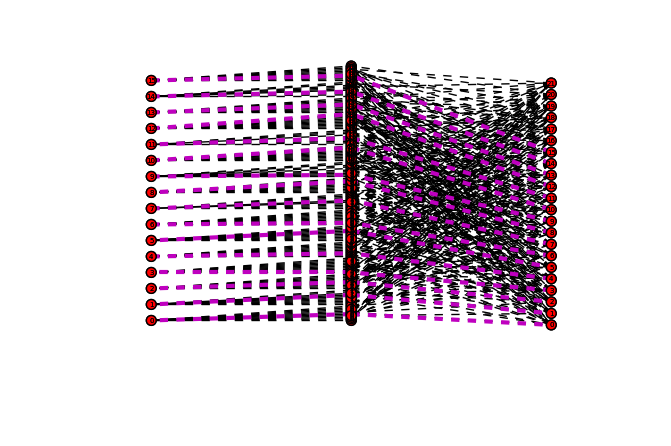

In [13]:
draw_graph(S, m, s_star_to_color_edges)

## Functions definitions

In [2]:
def parse_input(m):
    with open('data/input_{}.txt'.format(m), 'r') as myfile:
        data = [line.rstrip() for line in myfile]
    S = [[int(i) for i in item[:m]] for item in data]
    D = [int(item[m+2]) for item in data]
    return S, D

In [3]:
def build_ilp_solver(S, m, D):
    ilp_solver = pulp.LpProblem("ilp_solver", pulp.LpMinimize)
    s_star_to_color_edges = pulp.LpVariable.dicts("s_star_to_color_edges",
                                                  (('s_star_{}'.format(i), 'i_{}_c_{}'.format(i, c))
                                                   for i, c in product(range(m), range(10))),
                                                  cat="Binary")
    ilp_solver += 0
    for i in range(m):
        ilp_solver += pulp.lpSum(s_star_to_color_edges['s_star_{}'.format(i), 'i_{}_c_{}'.format(i, c)]
                                 for c in range(10)) == 1
    for i, s in enumerate(S):
        ilp_solver += pulp.lpSum(s_star_to_color_edges['s_star_{}'.format(i), 'i_{}_c_{}'.format(i, s[i])]
                                 for i in range(m)) == D[i]
    return ilp_solver, s_star_to_color_edges

In [4]:
def solve_ilp(ilp_solver, s_star_to_color_edges):
    ilp_solver.solve()
    assert(pulp.LpStatus[ilp_solver.status]=='Optimal')
    s_star_unsorted = {i: c 
                       for i,c in product(range(m), range(10))
                       if pulp.value(s_star_to_color_edges['s_star_{}'.format(i), 'i_{}_c_{}'.format(i, c)]) == 1.0}
    s_star = [s_star_unsorted[i] for i in range(m)]
    print ''.join([str(i) for i in s_star])
    return s_star

In [5]:
def draw_graph(S, m, s_star_to_color_edges):
    G = nx.Graph()
    G.add_nodes_from([('s_star_{}'.format(i), {'label':i, 'pos':[1, (i+1)*100]}) 
                      for i in range(m)])
    G.add_nodes_from([('i_{}_c_{}'.format(i, c), {'label':i, 'pos':[2, (i+1)*100 + c*10]}) 
                      for i, c in product(range(m), range(10))])
    loc_dif = (100*m)/len(S)
    G.add_nodes_from([('s_{}'.format(i), {'label':i, 'pos':[3, int((i+1)*loc_dif)]}) 
                      for i, s in enumerate(S)])
    
    G.add_edges_from([('i_{}_c_{}'.format(i, c), 's_star_{}'.format(i)) 
                      for i, c in product(range(m), range(10))])
    G.add_edges_from([('i_{}_c_{}'.format(i, c), 's_{}'.format(j))
                      for i, c in product(range(m), range(10))
                      for j in range(len(S))
                      if S[j][i] == c])
    
    
    pos = nx.get_node_attributes(G, 'pos')
    labels = nx.get_node_attributes(G, 'label')
    
    plt.figure()
    nx.draw(G, pos, node_size=50, node_color='r', labels=labels, font_size=5, style='dashed')
    
    G_sol = nx.Graph()
    G_sol.add_nodes_from(G.nodes())
    G_sol.add_edges_from([('i_{}_c_{}'.format(i, c), 's_star_{}'.format(i))
                          for i,c in product(range(m), range(10))
                          if pulp.value(s_star_to_color_edges['s_star_{}'.format(i), 'i_{}_c_{}'.format(i, c)]) == 1.0])
    G_sol.add_edges_from([('i_{}_c_{}'.format(i, c), 's_{}'.format(i))
                          for i,c in product(range(m), range(10))
                          if pulp.value(s_star_to_color_edges['s_star_{}'.format(i), 'i_{}_c_{}'.format(i, c)]) == 1.0])

    nx.draw(G_sol, pos, node_size=50, node_color='r', labels=labels, font_size=5, style='dashed', width=3.0, edge_color='m')

